In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pickle
import pandas as pd
import cv2

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
f = h5py.File('results/big_receipts.h5', 'r')

In [ ]:
f.close()

In [ ]:
# test image
filename = 'IMG_1049.jpeg_45'
img = np.array(f['data'][filename])

boxes = f['data'][filename].attrs['wordBB'].astype(np.int32)
# for i in range(boxes.shape[2]):
#     cv2.polylines(img, boxes[:,: i].T, 1, 255)

# cv2.circle(img, tuple(reshaped[10,6:8]), 5, (255,0,0))

plt.figure(figsize=(15,15))
imshow(img)

In [ ]:
x1,y1,x2,y2,x3,y3,x4,text

In [ ]:
keys = f['data'].keys()

In [ ]:
for filename in keys:
    try:
        reshaped = np.round(f['data'][filename].attrs['wordBB'].swapaxes(2, 0).reshape(-1, 8), 3)
    except:
        print('error', filename)
        continue

    split_f = filename.split('_')
    rep_num = split_f[2]
    split_2 = (split_f[0]+'_'+split_f[1]).split('.')
    cleaned_filename = split_2[0] + '_' + rep_num + '.' + split_2[1]
    
    cv2.imwrite('rot_training/images/'+cleaned_filename, cv2.cvtColor(f['data'][filename][:], cv2.COLOR_BGR2RGB))
    np.savetxt('rot_training/boxes/'+cleaned_filename.replace('.jpeg', '.txt'), reshaped, delimiter=",", fmt='%-10.5f')

In [ ]:
imshow(cv2.imread('rot_training/images/'+cleaned_filename))

In [ ]:
out_db = h5py.File('receipt2.h5','w')
out_db.create_group('depth')
out_db.create_group('image')
out_db.create_group('seg')

In [ ]:
with open('/home/philip/hive-literate/FCRN-DepthPrediction/tensorflow/results.pkl', 'r') as f:
    pkl_file = pickle.load(f)

In [ ]:
import os

df = pd.read_csv('new/manual_points.txt', header=None)
df.columns=['img_path', 'x', 'y']

for name, depth, img in pkl_file:
    fname = os.path.basename(name)
    out_db['depth'].create_dataset(fname, data=depth)
    out_db['image'].create_dataset(fname, data=img)
    
    img = cv2.imread(name)

    points = df[df['img_path'] == name][['x','y']].values
    points = points.reshape(1,points.shape[0],2)

    empty_mask = np.ones(img.shape[0:2])
    res = cv2.fillPoly(empty_mask, points.astype(np.int32),2)
    
    area = [np.sum(res[res == 1]), np.sum(res[res == 2])]
    out_db['seg'].create_dataset(fname, data=res)
    out_db['seg'][fname].attrs['label'] = [1, 2]
    out_db['seg'][fname].attrs['area'] = area
    
out_db.close()
    

In [ ]:
test_boxes = np.round(f['data'][filename].attrs['wordBB'].swapaxes(2, 0).reshape(-1, 8), 3)

In [ ]:
filename = 'IMG_1049.jpeg_45'
img = np.array(f['data'][filename])

boxes = f['data'][filename].attrs['wordBB'].astype(np.int32)
for i in range(boxes.shape[2]):
    cv2.polylines(img, boxes[:,: i].T, 1, 255)

cv2.circle(img, tuple(reshaped[10,6:8]), 5, (255,0,0))

plt.figure(figsize=(15,15))
imshow(img)

In [ ]:
boxes[:,:,1]

In [ ]:
box1 = cv2.minAreaRect(boxes[:,:,1].T.astype(np.int32))
box2 =  cv2.minAreaRect(boxes[:,:,2].T.astype(np.int32))

In [ ]:
box1

In [ ]:
cv2.rotatedRectangleIntersection(box1, box1)

In [ ]:
box1 = tuple(test_boxes[0,:].reshape(2, -1))
box2 = tuple(test_boxes[0,:].reshape(2, -1))

cv2.rotatedRectangleIntersection(box1, box2)

In [ ]:
import numpy as np
bf_decimal = lambda : '%.f' % max(1, np.random.normal(30, 15))
af_decimal = lambda : np.random.choice(['99', '00', str('%.f' %(np.random.rand()*100)).zfill(2)], p=[0.5, 0.3, 0.2])
price = lambda : '.'.join((bf_decimal(), af_decimal()))

In [ ]:
import numpy as np

bf_decimal = lambda : '%.f' % np.random.choice([max(1, np.random.normal(30, 15)),
                                                max(1, np.random.normal(7, 3))])
af_decimal = lambda : np.random.choice(['99', '00', str('%.f' %(np.random.rand()*100)).zfill(2)], p=[0.5, 0.3, 0.2])
post = lambda : np.random.choice([' F', ' S', ' T', ' B'])
price = lambda : '.'.join((bf_decimal(), af_decimal()))


with open('data/product_codes/product_codes.txt') as f:
    product_stuff = [x.strip() for x in f.readlines()]


In [ ]:
prices = [price() + post() for x in range(len(product_stuff))]

In [ ]:
zipped = list(zip(product_stuff, prices))

In [ ]:
new_strings = []
for string, price in zipped:
    string = string.replace('"', '')
    string = list(string)
    price = list(price)
    if len(string) > 20:
        string = string[:20]
    new_string = [' '] * 30
    new_string[:len(string)] = string
    new_string[-len(price):] = price
    new_strings.append(''.join(new_string).upper())

In [ ]:
price_discounts = []
for i in range(len(new_strings)//2):
    str1 = 'Regular Price'
    str2 = 'Card Savings'
    
    price = price()
    
    new_string = [' '] * 24
    
    price_discounts.append()

In [ ]:
with open('data/product_codes/products_with_prices.txt', 'w') as f:
    f.write('\n'.join(new_strings))

In [ ]:
new_strings[:500]

In [ ]:
with open('data/product_codes/prices.txt', 'w') as f:
    f.write('\n'.join(prices))

In [3]:
from gen import *

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
print colorize(Color.BLUE,'getting data..',bold=True)
#db = get_data()
db = h5py.File('receipt.h5', 'r')
print colorize(Color.BLUE,'\t-> done',bold=True)

# get the names of the image files in the dataset:
imnames = sorted(db['image'].keys())
N = len(imnames)
global NUM_IMG
if NUM_IMG < 0:
    NUM_IMG = N
start_idx,end_idx = 0,min(NUM_IMG, N)

RV3 = RendererV3(DATA_PATH,max_time=SECS_PER_IMG)

def get_img(i):
    imname = imnames[i]
    # get the image:
    img = Image.fromarray(db['image'][imname][:])
    # get the pre-computed depth:
    #  there are 2 estimates of depth (represented as 2 "channels")
    #  here we are using the second one (in some cases it might be
    #  useful to use the other one):
    depth = db['depth'][imname][:]
    #depth = depth[:,:,1]
    # get segmentation:
    seg = db['seg'][imname][:].astype('float32')
    area = db['seg'][imname].attrs['area']
    label = db['seg'][imname].attrs['label']

    img = np.array(img)
    seg = np.array(seg)
    # re-size uniformly:
    #      sz = depth.shape[:2][::-1]
    #      img = np.array(img.resize(sz,Image.ANTIALIAS))
    #      seg = np.array(Image.fromarray(seg).resize(sz,Image.NEAREST))

    print colorize(Color.RED,'%d of %d'%(i,end_idx-1), bold=True)
    res = RV3.render_text(img,depth,seg,area,label,
                        ninstance=1,viz=False)
    plt.figure(figsize=(32,18))
    imshow(res[0]['img'])

getting data..
	-> done
(91, 12)


In [8]:
RV3 = RendererV3(DATA_PATH,max_time=SECS_PER_IMG)

(91, 12)


In [ ]:
[0, 2, 4, 6, 7,8,9,10,11,12,13,14,16,17,18,20]

24 of 24
 ** instance # : 0
91


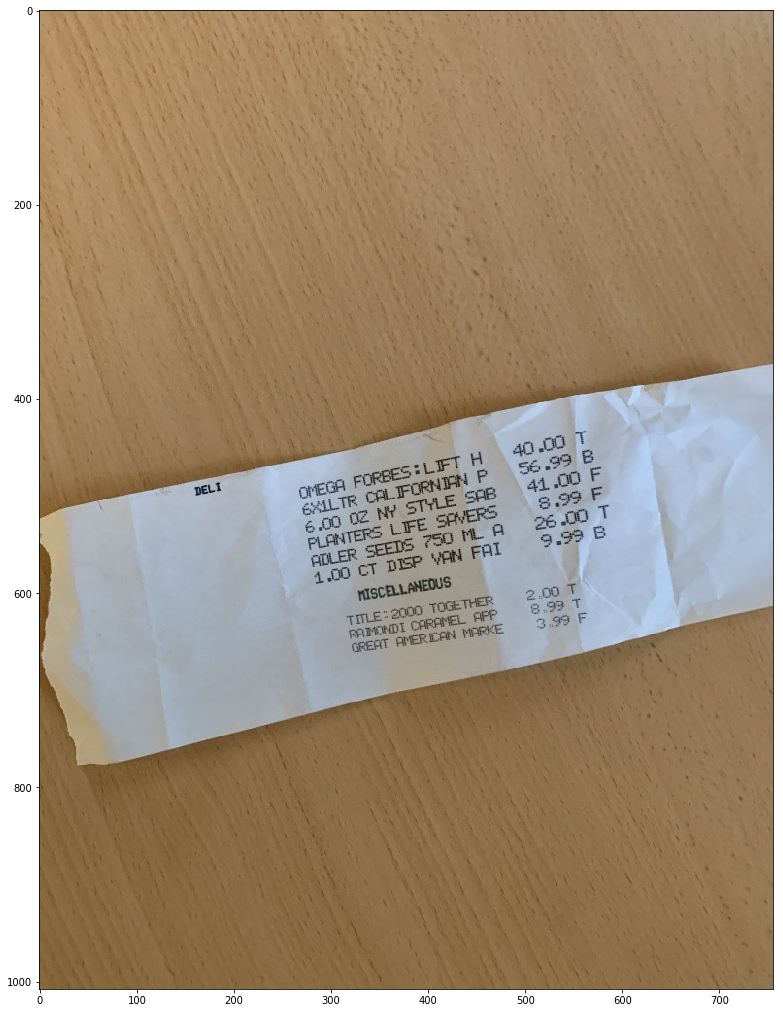

In [18]:
get_img(24)

In [ ]:
font_state = FontState('data')

In [ ]:
from matplotlib.pyplot import imshow
%matplotlib inline

In [ ]:
plt.figure(figsize=(16,9))
imshow(res[0]['img'])